In [59]:
import os.path
import os
#Importando as bibliotecas

import cv2
import numpy as np
import glob
#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w8  - Image Recognition\data"

In [60]:
faceCascade = cv2.CascadeClassifier(DATA_PATH +
                                    '\models\haarcascade_frontalface_default.xml')

In [61]:
faceNeighborsMax = 10
neighborStep = 1

In [69]:
image = cv2.imread(DATA_PATH +'\images\hillary_clinton.jpg' )
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Face Detection

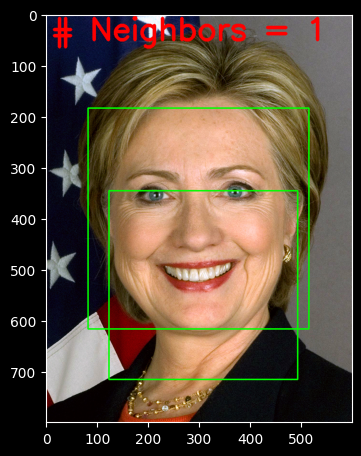

In [70]:
plt.figure(figsize=(18,18))

count = 1

for neigh in range(1, faceNeighborsMax, neighborStep):
    faces = faceCascade.detectMultiScale(grayimage, 1.2, neigh)
    imagecopy = np.copy(image)

    for  x, y, w, h in faces:
        cv2.rectangle(imagecopy, (x, y),
                      (x + w, y + h),
                      (0, 255, 0), 2)

    cv2.putText(imagecopy,
                "# Neighbors = {}".format(neigh), (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 6)

    plt.subplot(3,3,count)
    plt.imshow(imagecopy[:,:,::-1])
    count += 1
plt.show()

## Face and Smile Detection

In [71]:
faceCascade = cv2.CascadeClassifier(DATA_PATH +
                                    '/models/haarcascade_frontalface_default.xml')
smileCascade = cv2.CascadeClassifier(DATA_PATH +
                                     '/models/haarcascade_smile.xml')
smileNeighborsMax = 90
neighborStep = 10

In [72]:
image = cv2.imread(DATA_PATH +'\images\hillary_clinton.jpg' )
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [73]:
faces = faceCascade.detectMultiScale(grayimage, 1.4, 5)

In [74]:
for x, y, w, h in faces:
    cv2.rectangle(image, (x, y),
                  (x + w, y + h),
                  (0, 255, 0), 2)
    faceRoiGray = grayimage[y: y + h, x: x + w]
    faceRoiOriginal = image[y: y + h, x: x + w]

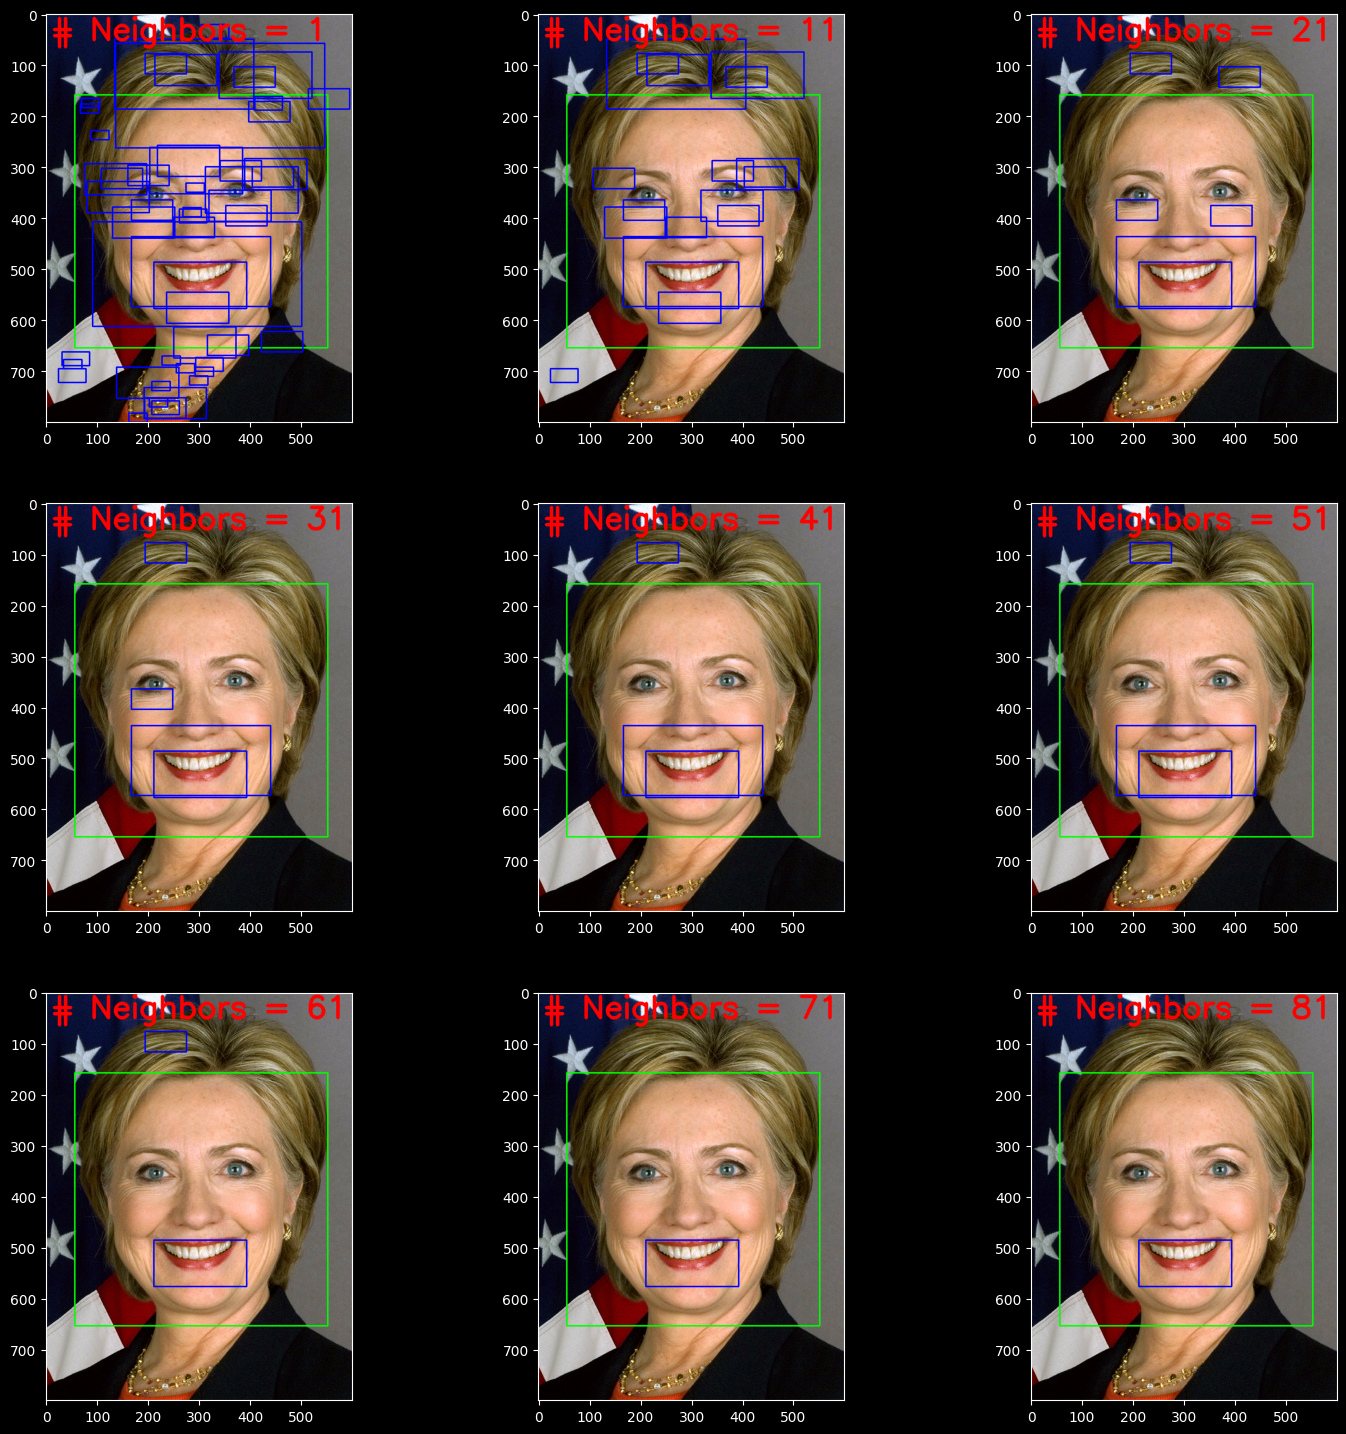

In [75]:
plt.figure(figsize=(18,18))
count = 1

for neigh in range(1, smileNeighborsMax, neighborStep):
    smile = smileCascade.detectMultiScale(grayimage, 1.5, neigh)

    imagecopy = np.copy(image)
    imageRoiClone = imagecopy[y: y + h, x: x + w]

    for  xx, yy, ww, hh in smile:
        cv2.rectangle(imagecopy, (xx, yy),
                      (xx + ww, yy + hh),
                      (255, 0, 0), 2)

    cv2.putText(imagecopy,
                "# Neighbors = {}".format(neigh), (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 6)

    plt.subplot(3,3,count)
    plt.imshow(imagecopy[:,:,::-1])
    count += 1
plt.show()

https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework

http://www.merl.com/publications/docs/TR2004-043.pdf

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html

http://docs.opencv.org/3.2.0/db/d28/tutorial_cascade_classifier.html

http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html

http://www.pyimagesearch.com/2015/05/11/creating-a-face-detection-api-with-python-and-opencv-in-just-5-minutes/

http://docs.opencv.org/2.4/doc/tutorials/core/file_input_output_with_xml_yml/file_input_output_with_xml_yml.html

https://docs.opencv.org/4.1.0/d7/d8b/tutorial_py_face_detection.html
http://www.willberger.org/cascade-haar-explained/
https://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/